In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'/Users/daljeetsinghsodha/Desktop/Avneet/Projects/largest_companies_by_number_of_employees.csv')
df

,Rank,Name,Symbol,employees_count,price (USD),country
0,1,Walmart,WMT,2100000,59.83000,United States
1,2,Amazon,AMZN,1500000,185.99000,United States
2,3,Foxconn (Hon Hai Precision Industry),2317.TW,826608,5.34534,Taiwan
3,4,Accenture,ACN,733000,308.52000,Ireland
4,5,Volkswagen,VOW3.DE,650951,130.99200,Germany
...,...,...,...,...,...,...
8396,8397,Australian Foundation Investment Company,AFI.AX,0,4.84181,Australia
8397,8398,Bâloise,BALN.SW,0,164.88500,Switzerland
8398,8399,Royalty Pharma,RPRX,0,28.21000,United Kingdom
8399,8400,Great Elm Capital,GECC,0,10.33000,United States


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             8401 non-null   int64  
 1   Name             8401 non-null   object 
 2   Symbol           8400 non-null   object 
 3   employees_count  8401 non-null   int64  
 4   price (USD)      8401 non-null   float64
 5   country          8399 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 393.9+ KB


In [4]:
df2= df.convert_dtypes()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             8401 non-null   Int64  
 1   Name             8401 non-null   string 
 2   Symbol           8400 non-null   string 
 3   employees_count  8401 non-null   Int64  
 4   price (USD)      8401 non-null   Float64
 5   country          8399 non-null   string 
dtypes: Float64(1), Int64(2), string(3)
memory usage: 418.5 KB


In [5]:
df.isnull().sum()

Rank               0
Name               0
Symbol             1
employees_count    0
price (USD)        0
country            2
dtype: int64

In [7]:
null_rows = df.loc[df['country'].isnull()]
print(null_rows)

      Rank                            Name  Symbol  employees_count  \
650    651                        Ceconomy  CEC.DE            42863   
1403  1404  Bank of the Philippine Islands   BPHLY            17573   

      price (USD) country  
650       2.82639     NaN  
1403     43.50000     NaN  


In [8]:
df.loc[650,'country']='Germany'

In [9]:
df.loc[1403,'country']='Philippines'

In [10]:
df.iloc[650]

Rank                    651
Name               Ceconomy
Symbol               CEC.DE
employees_count       42863
price (USD)         2.82639
country             Germany
Name: 650, dtype: object

In [11]:
df.iloc[1403]

Rank                                         1404
Name               Bank of the Philippine Islands
Symbol                                      BPHLY
employees_count                             17573
price (USD)                                  43.5
country                               Philippines
Name: 1403, dtype: object

In [12]:
df.isnull().sum()

Rank               0
Name               0
Symbol             1
employees_count    0
price (USD)        0
country            0
dtype: int64

In [13]:
df_top=df.head(10)
df_top

,Rank,Name,Symbol,employees_count,price (USD),country
0,1,Walmart,WMT,2100000,59.83000,United States
1,2,Amazon,AMZN,1500000,185.99000,United States
2,3,Foxconn (Hon Hai Precision Industry),2317.TW,826608,5.34534,Taiwan
3,4,Accenture,ACN,733000,308.52000,Ireland
4,5,Volkswagen,VOW3.DE,650951,130.99200,Germany
5,6,Tata Consultancy Services,TCS.NS,614795,46.73920,India
6,7,DHL Group (Deutsche Post),DHL.DE,589184,43.82000,Germany
7,8,BYD,002594.SZ,570100,30.25230,China
8,9,Compass Group,CPG.L,550000,28.72170,United Kingdom
9,10,United Parcel Service,UPS,500000,147.94000,United States


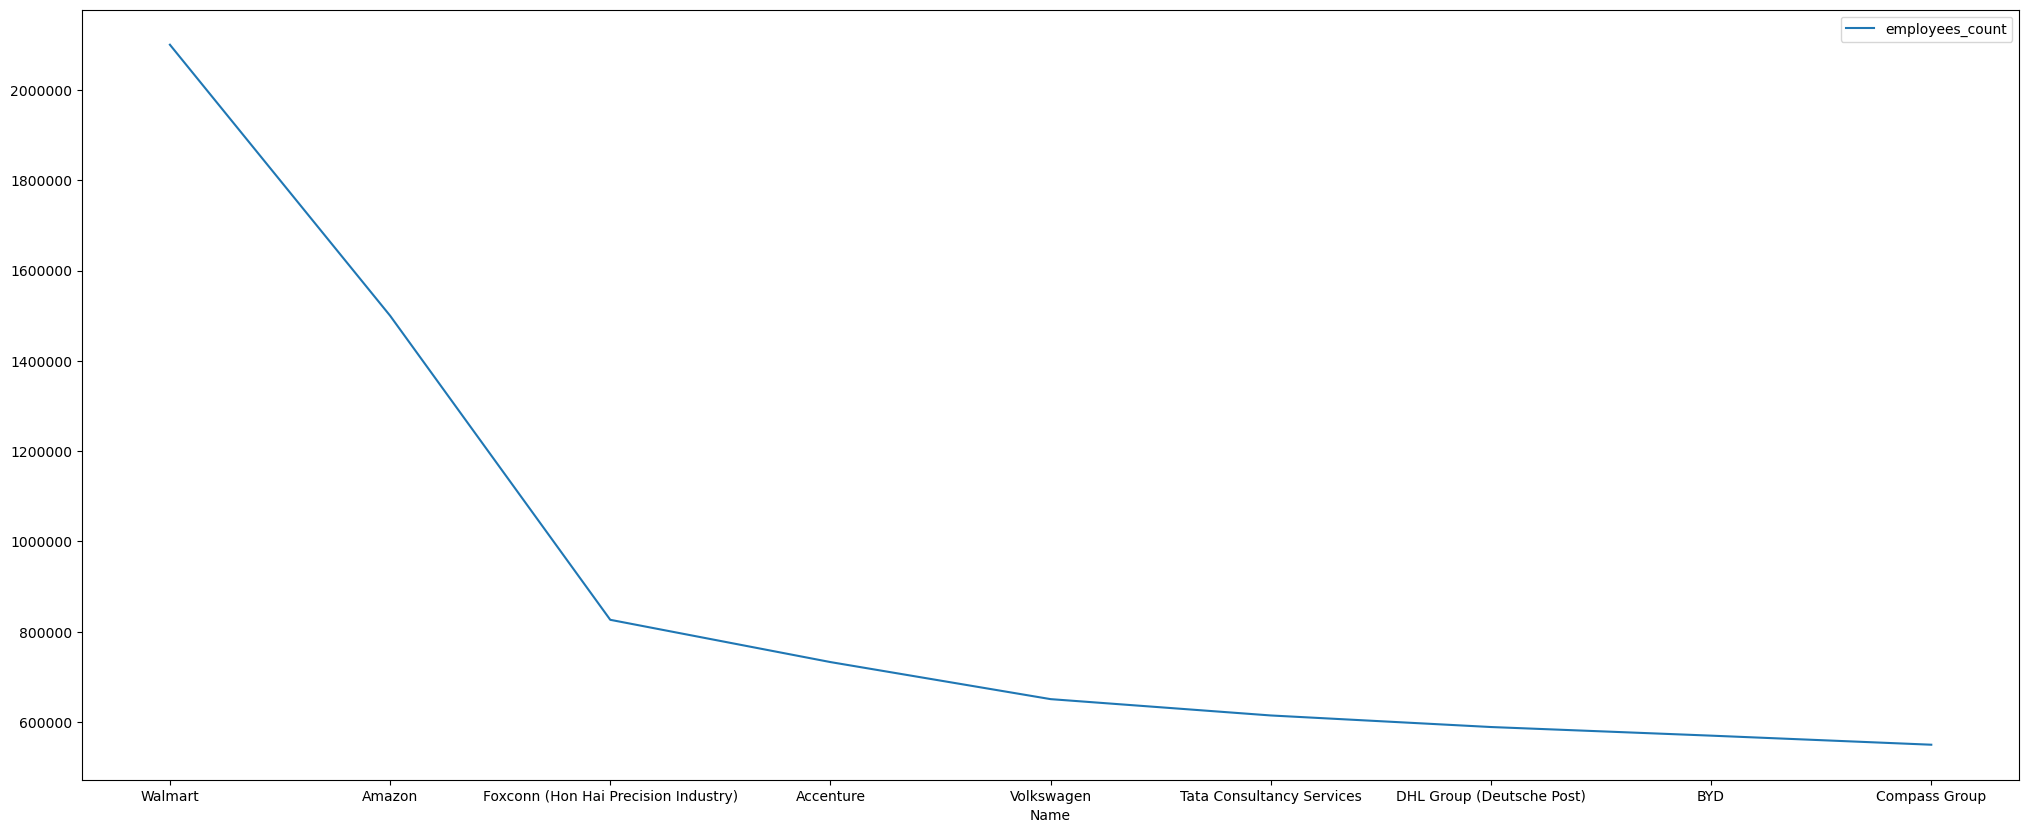

In [14]:
df_top.iloc[0:9].plot(kind='line',x='Name',y='employees_count', figsize=(25,10))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

In [15]:
df_loc=df['country'].value_counts()
df_loc

country
United States             3619
India                      570
Canada                     391
Japan                      347
China                      314
                          ... 
Nigeria                      1
USA                          1
Jordan                       1
Sudan                        1
British Virgin Islands       1
Name: count, Length: 78, dtype: int64

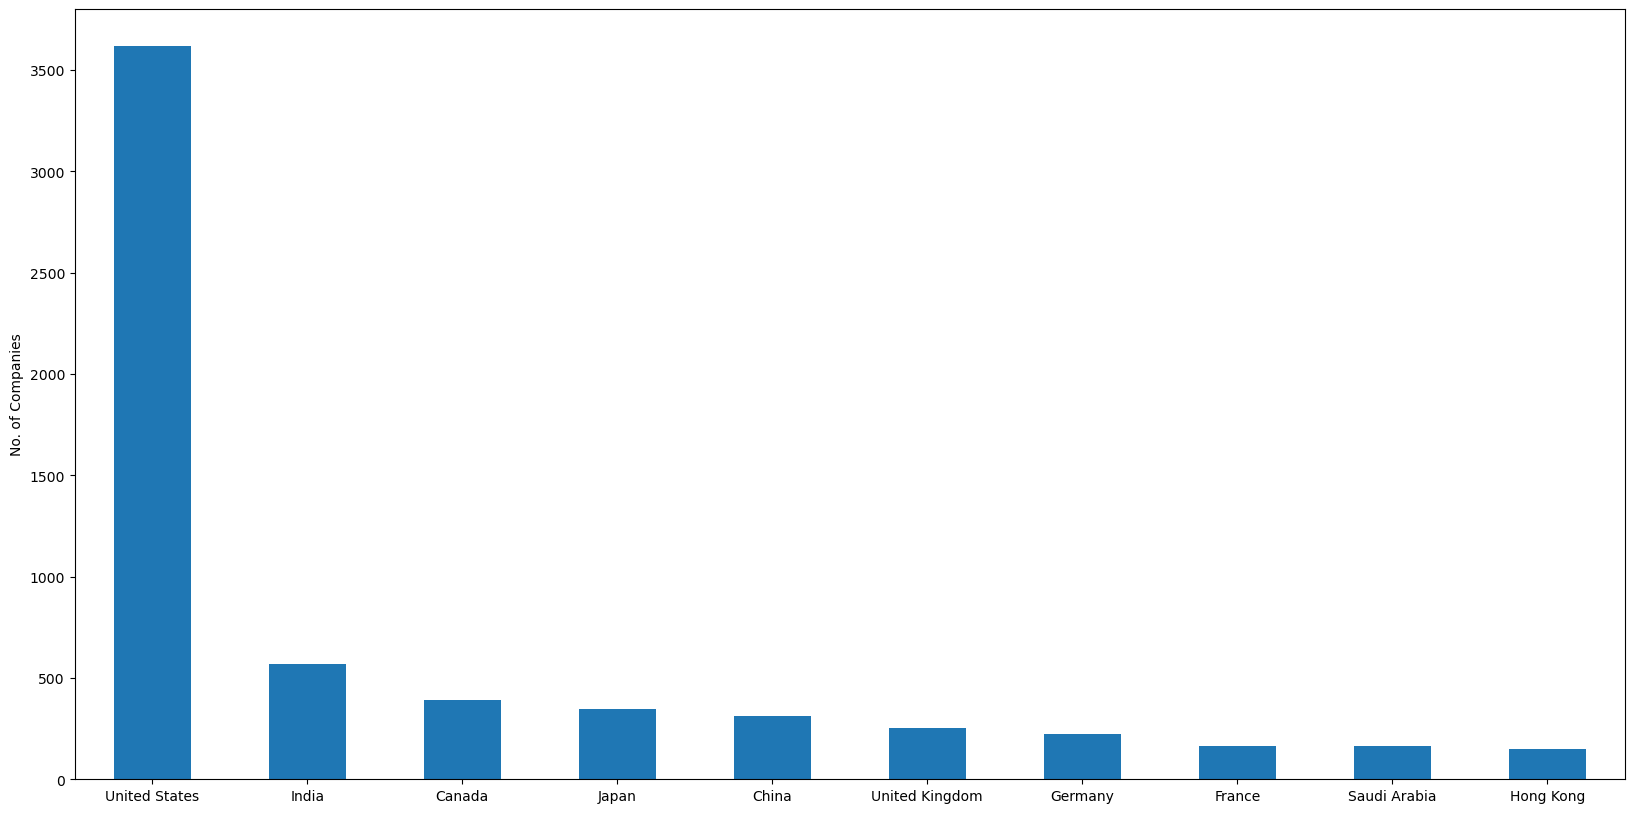

In [16]:
#No of companies per top 10 countries
fig, ax = plt.subplots(figsize=(20, 10))
df_loc.iloc[0:10].plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("No. of Companies")
plt.xlabel("")
plt.show()

<Axes: >

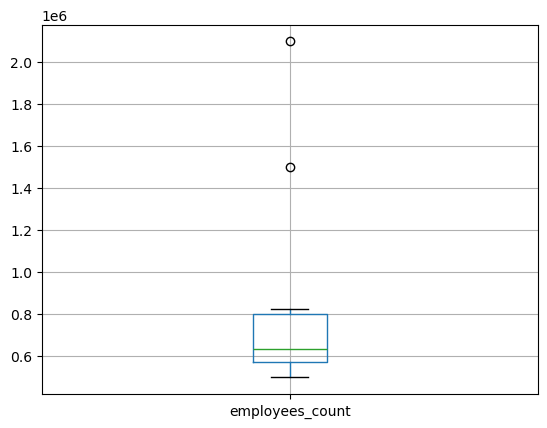

In [17]:
df_top.boxplot(column=['employees_count'])

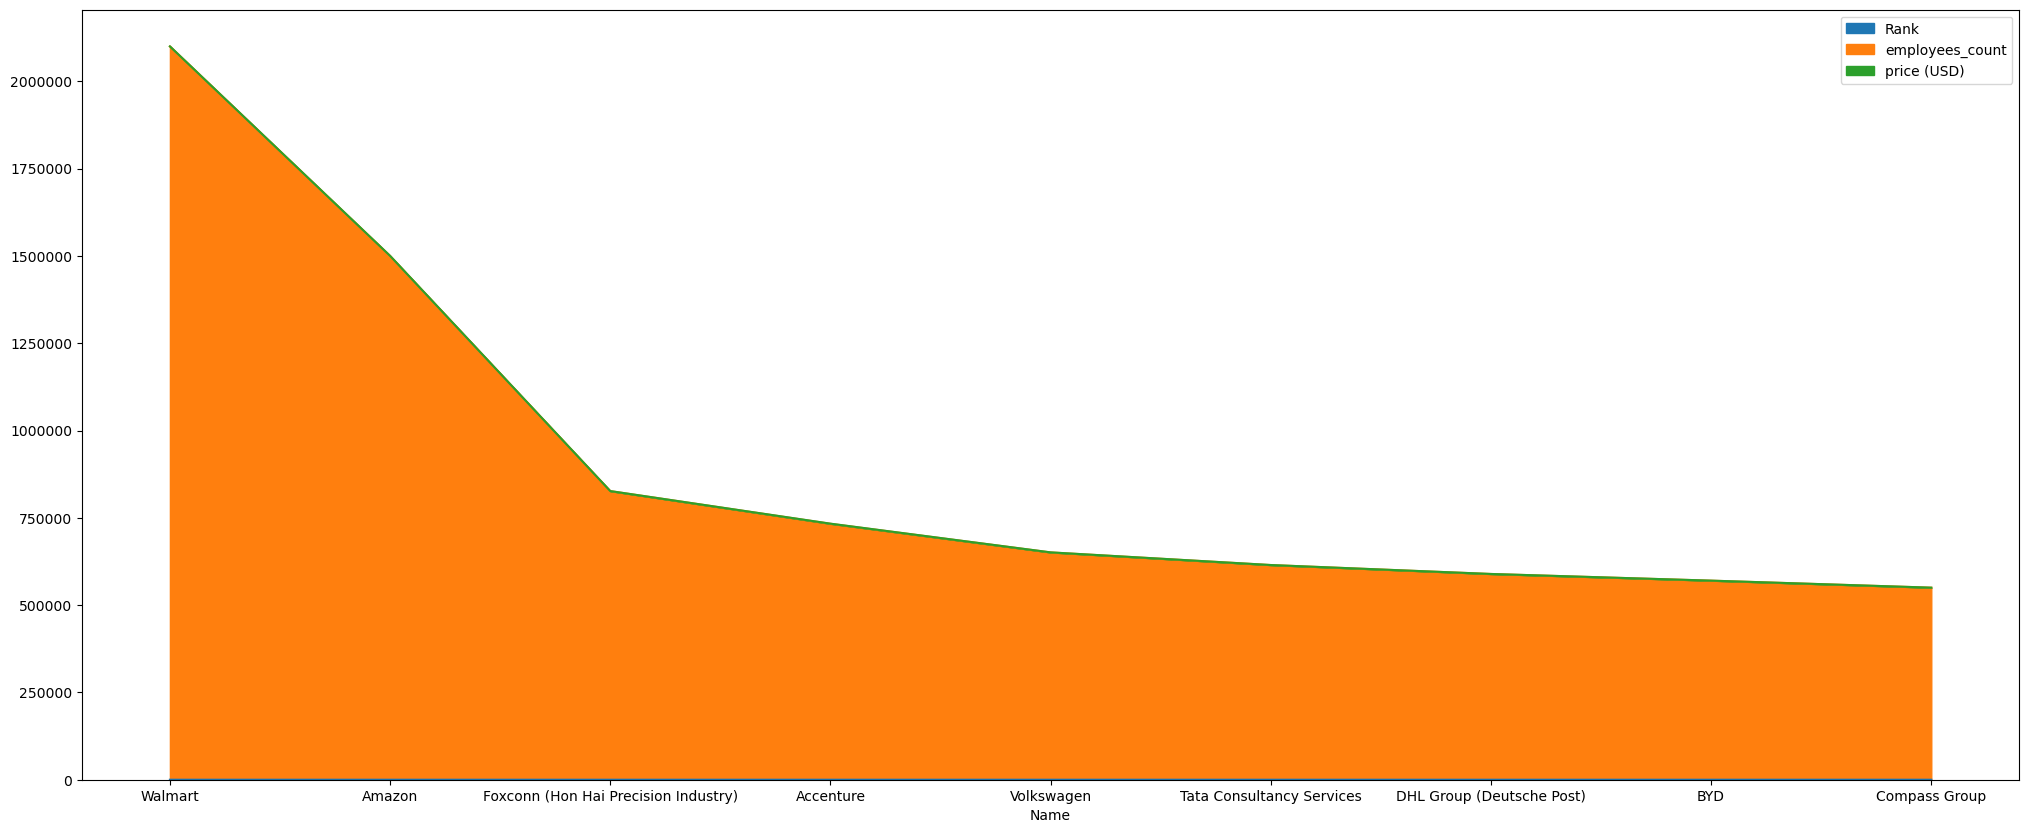

In [18]:

df_top.iloc[0:9].plot.area(x='Name',figsize=(25,10))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

<Axes: xlabel='country', ylabel='Name'>

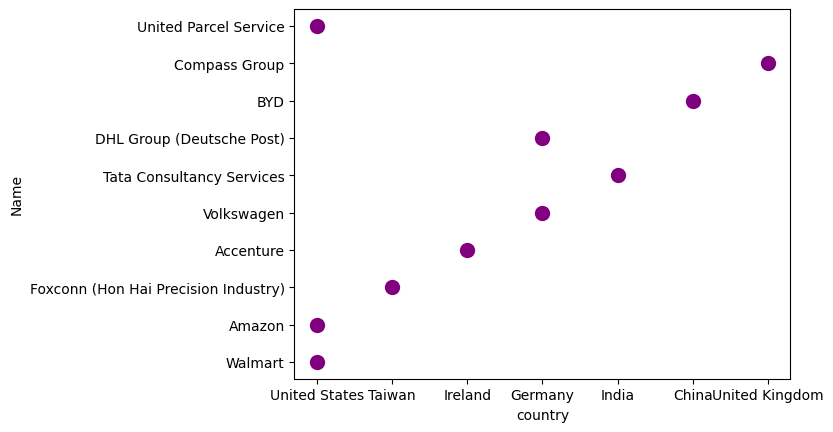

In [19]:
df_top.plot.scatter(x='country',y='Name', s=100, color='Purple')

In [20]:
df.corr(numeric_only=True)

,Rank,employees_count,price (USD)
Rank,1.000000,-0.408964,-0.020683
employees_count,-0.408964,1.000000,0.016806
price (USD),-0.020683,0.016806,1.000000


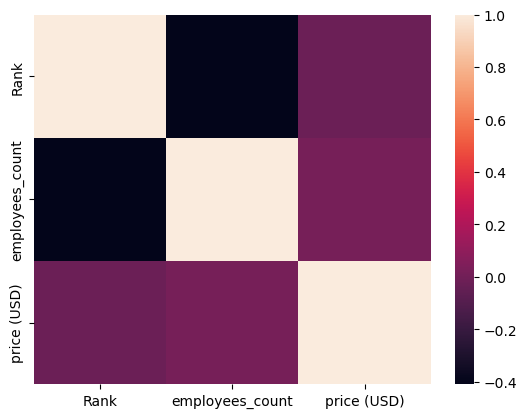

In [21]:
sns.heatmap(df.corr(numeric_only=True))
plt.rcParams['figure.figsize']=(10,10)
plt.show()